# Homework 1
### Direct Methods for the solution of Linear Systems.
**1**. Given a matrix $A \in \mathbb{R}^{n \times n}$ and the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$, write a script that:

* Computes the right-hand side of the linear system $b = Ax_{true}$.
* Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
* Solves the linear system $Ax = b$ with the function `np.linalg.solve()`.
* Computes the relative error between the solution computed before and the true solution $x_{true}$.  
Remember that the relative error between $x_{true}$ and $x$ in $R^n$ can be computed as $$E(x_{true}, x) = \frac{\|x − x_{true}\|_2}{\|x_{true}\|_2}$$
* Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a new window) the condition number in 2-norm $K_2(A)$ and in $\infty$-norm, as a function of $n$.

**2**. Test the program above with the following choices of $A\in \mathbb{R}^{n \times n}$:
* A **random matrix** (created with the function `np.random.rand()`) with size varying with $ n = \{10, 20, 30, ..., 100\}$.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

random_state = 42 # This is used to guarantee the repetability

In [2]:
N = np.arange(10,101,10)
errors = np.zeros(N.shape) # DON'T use zeros_like(N). You can only update it with INT values!
k2s = np.zeros(N.shape)
kinfs = np.zeros(N.shape)

# Check
print(errors.shape, k2s.shape, kinfs.shape, N.shape)

(10,) (10,) (10,) (10,)


In [3]:
np.random.seed(random_state)

for i,n in enumerate(N):
    x_true = np.ones((n,)) 
    A = np.random.randn(n,n)
    b = A @ x_true

    # Compute the condition number
    k2_A = np.linalg.cond(A, 2)
    k2s[i] = k2_A
    kinf_A = np.linalg.cond(A, np.inf)
    kinfs[i] = kinf_A
    # print(k2_A, kinf_A, sep='\n')

    # Solve the system
    x_sol = np.linalg.solve(A, b)

    # Compute the error
    e = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
    errors[i] = e

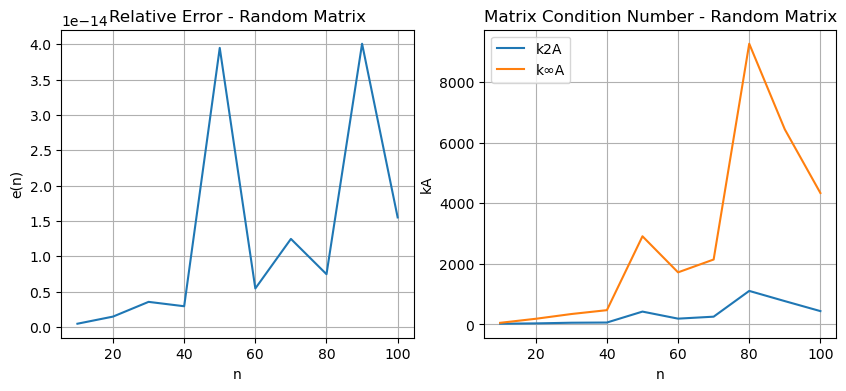

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(N, errors)
plt.title('Relative Error - Random Matrix')
plt.xlabel('n')
plt.ylabel('e(n)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(N, k2s)
plt.plot(N, kinfs)
plt.title('Matrix Condition Number - Random Matrix')
plt.xlabel('n')
plt.ylabel('kA')
plt.legend(['k2A', 'k\u221EA']) # \u221E unicode of infinity symbol
plt.grid()

* The **Vandermonde matrix** (`np.vander`) of dimension $n = \{5, 10, 15, 20, 25, 30\}$ with respect to the vector $x = \{1, 2, 3, ..., n\}$.

In [5]:
N = np.arange(5,35,5)
errors = np.zeros(N.shape)
k2s = np.zeros(N.shape)
kinfs = np.zeros(N.shape)

# Check
# print(errors.shape, k2s.shape, kinfs.shape, N.shape)

In [6]:
for i,n in enumerate(N):
    
    x_true = np.ones((n,)) 
    A = np.vander(np.arange(1,n+1,1), increasing=True) # i want an increasing vandermonde matrix
    b = A @ x_true

    # Compute the condition number
    k2_A = np.linalg.cond(A, 2)
    k2s[i] = k2_A
    kinf_A = np.linalg.cond(A, np.inf)
    kinfs[i] = kinf_A
    # print(k2_A, kinf_A, sep='\n')

    # Solve the system
    x_sol = np.linalg.solve(A, b)

    # Compute the error
    e = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
    errors[i] = e

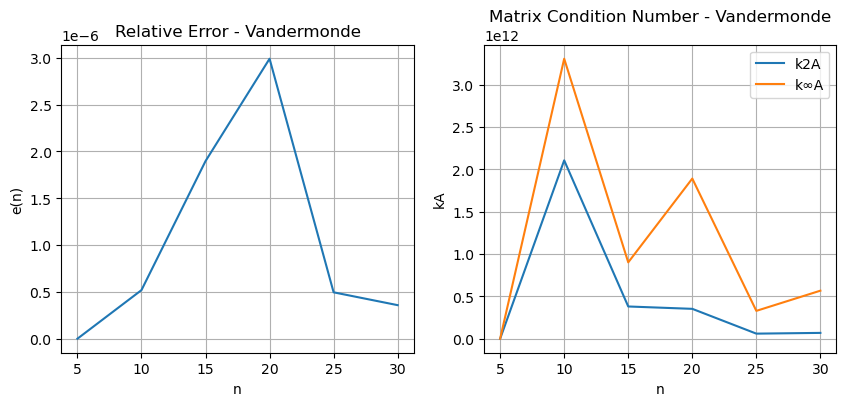

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(N, errors)
plt.title('Relative Error - Vandermonde')
plt.xlabel('n')
plt.ylabel('e(n)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(N, k2s)
plt.plot(N, kinfs)
plt.title('Matrix Condition Number - Vandermonde')
plt.xlabel('n')
plt.ylabel('kA')
plt.legend(['k2A', 'k\u221EA']) # \u221E unicode of infinity symbol
plt.grid()

* The **Hilbert matrix** (`scipy.linalg.hilbert`) of dimension $n = \{4, 5, 6, ..., 12\}$.

In [8]:
N = np.arange(4,13,1)
errors = np.zeros(N.shape)
k2s = np.zeros(N.shape)
kinfs = np.zeros(N.shape)

# Check
# print(errors.shape, k2s.shape, kinfs.shape, N.shape)

In [9]:
import scipy

for i,n in enumerate(N):
    
    x_true = np.ones((n,)) 
    A = scipy.linalg.hilbert(n)
    b = A @ x_true

    # Compute the condition number
    k2_A = np.linalg.cond(A, 2)
    k2s[i] = k2_A
    kinf_A = np.linalg.cond(A, np.inf)
    kinfs[i] = kinf_A
    # print(k2_A, kinf_A, sep='\n')

    # Solve the system
    x_sol = np.linalg.solve(A, b)

    # Compute the error
    e = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
    errors[i] = e

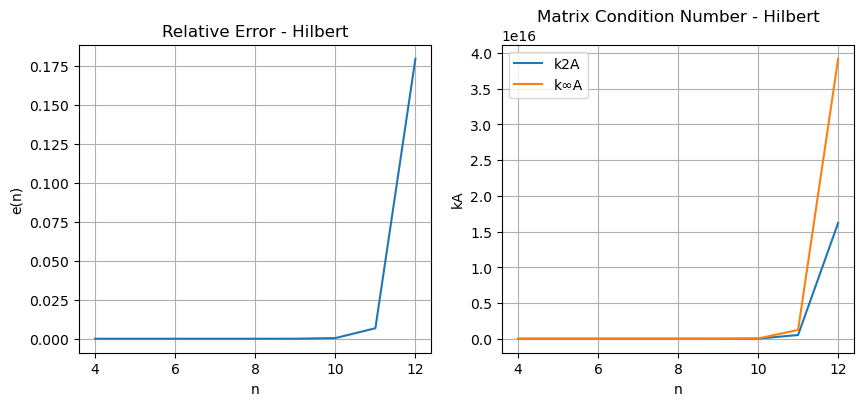

In [10]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(N, errors)
plt.title('Relative Error - Hilbert')
plt.xlabel('n')
plt.ylabel('e(n)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(N, k2s)
plt.plot(N, kinfs)
plt.title('Matrix Condition Number - Hilbert')
plt.xlabel('n')
plt.ylabel('kA')
plt.legend(['k2A', 'k\u221EA']) # \u221E unicode of infinity symbol
plt.grid()

### Floating Point Arithmetic.

**1.** The Machine epsilon $\epsilon$ is the distance between 1 and the next floating point number. Compute $\epsilon$, which is defined as the smallest floating point number such that it holds:
$fl(1+\epsilon)>1$

*Tips*: use a `while`structure.

In [11]:
eps = 1

while(1 + eps) > 1:
    eps /= 2
    
eps *= 2
print(f"machine precision \u03F5: {eps}")

machine precision ϵ: 2.220446049250313e-16


`note:` the value obtained depends on the starting point of $\epsilon$.

**2.** Let's consider the sequence $a_{n} = (1 + \frac{1}{n})^n$. It is well known that:  
$\lim_{n \to \infty} a_{n} = e$  
where $e$ is the Euler costant. Choose different values for $n$, compute $a_{n}$ and compare it to the real value of the Euler costant. What happens if you choose a large value of $n$? Guess the reason.

In [12]:
N = np.arange(1,10000,1)
a_n_vec = np.zeros(N.shape)
e = np.full(N.shape, np.exp(1))

In [13]:
for i,n in enumerate(N):
    a_n = (1 + 1/n)**n
    a_n_vec[i] = a_n

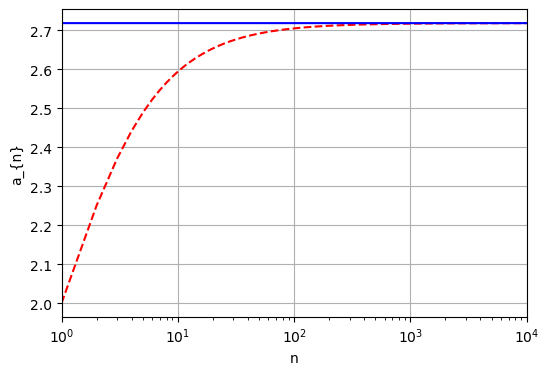

In [14]:
plt.figure(figsize=(6,4))

plt.plot(N, a_n_vec, '--', color='red')
plt.plot(N, e, '-', color='blue')
plt.xscale('log') # logaritmic scale to exploit better the results

plt.xlim([1, 10000])

plt.xlabel('n')
plt.ylabel('a_{n}')
plt.grid()
plt.show()

In [15]:
N = np.array([])
a_n_vec = np.array([])
n = 1

while n <= 1e+20:
    N = np.append(N, n)
    a_n = (1 + 1/n)**n
    a_n_vec = np.append(a_n_vec, a_n)
    n *= 2
#     if a_n < 2:
#         print(a_n, n)
#         break
e = np.full(N.shape, np.exp(1))

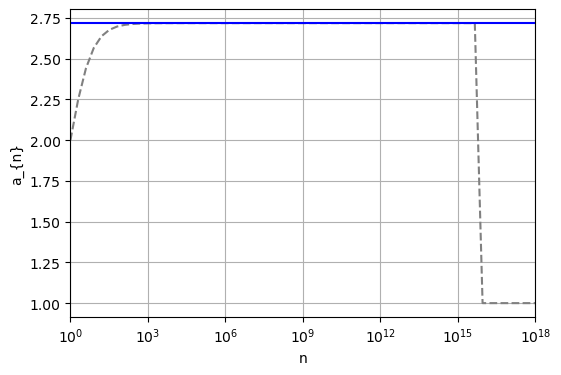

In [16]:
plt.figure(figsize=(6,4))

plt.plot(N, a_n_vec, '--', color='grey')
plt.plot(N, e, '-', color='blue')
plt.xscale('log') # logaritmic scale to exploit better the results
plt.xlim([1, 1e+18])

plt.xlabel('n')
plt.ylabel('a_{n}')
plt.grid()
plt.show()

**3.** Let's consider the matrices:
$$
A = \left(\begin{array}{cc} 
4 & 2\\
1 & 3
\end{array}\right), B = \left(\begin{array}{cc} 
4 & 2\\
2 & 1
\end{array}\right)
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples.

*Tips*: Please, have a look at `np.linalg`

In [17]:
A = np.array([[4,2],[1,3]])
B = np.array([[4,2],[2,1]])
C = np.array([[4,2,2],[6,3,3],[2,1,1]])

In [18]:
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)
print(f"A rank: {rank_A}")
print(f"B rank: {rank_B}")
print(f"C rank: {rank_C}")

A rank: 2
B rank: 1
C rank: 1


In [19]:
eigen_values_A = np.linalg.eigvals(A)
eigen_values_B = np.linalg.eigvals(B)
eigen_values_C = np.linalg.eigvals(C)
print(f"eigen values of A: {eigen_values_A}")
print(f"eigen values of B: {eigen_values_B}")
print(f"eigen values of C: {eigen_values_C}")

eigen values of A: [5. 2.]
eigen values of B: [5. 0.]
eigen values of C: [8.00000000e+00 1.70261195e-17 4.88420812e-16]


### Consideration:
Let's remember the definition of eigenvalues $\lambda$ of a Matrix **A** of dimension $n\times n$:  
$$A \mathbf{x} = \lambda \mathbf{x}$$

If $\lambda = 0$ is an eigenvalue of **A**, it means that $A \mathbf{x} = 0$ and so $Ker(A)$ has dimension 1.  
At the same time, if we have more than one eigenvalues = 0, it means that there is another eigenvector associated with it (linearly independent from the previous one). This implies that $Ker(A)$ has dimension equal to the number of eigenvalues = 0.  
We can observe that the number of the eigenvalues = 0 of a matrix is equal to $n - rank(A)$.

In fact, if we consider the rank-nullity theorem, we have:  
$$rank(\mathbf{A}) + dim(ker(\mathbf{A})) = n$$

**it doesn't make sense to have an eigenvalue = 0**